# Segmentos y Churn de Hotel VIP

## Objetivo:

Como dueño de un hotel famoso y con muchas transacciones, registro comercial pendiente a confirmar, deseo saber cuales son mis segmentos de clientes y que segmento es el que tiene mayor perdida porcentual de clientes.


## Datos:

- tlacuachitos_vip_transactions.csv
- tlacuachitos_vip_customers_data.csv

## Actividad 1)
- Elabora y explica segmentos de clientes que podría usar para realizar mi dirección estratégica.

## Actividad 2)
- Calcula y obtén el porcentaje de clientes perdidos que tengo en cada segmento

In [41]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Importar los datos

In [12]:
df = pd.read_csv('tlacuachitos_vip_transactions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           1143 non-null   int64  
 1   Age                  1143 non-null   int64  
 2   Income               1143 non-null   float64
 3   Tenure               1143 non-null   int64  
 4   Education            1143 non-null   object 
 5   Industry             1143 non-null   object 
 6   Geographic Location  1143 non-null   object 
 7   Churn_Risk           1143 non-null   int64  
 8   Cohort               1143 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 80.5+ KB


In [16]:
de = pd.read_csv('tlacuachitos_vip_customers_data.csv')
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           1143 non-null   int64  
 1   Age                  1143 non-null   int64  
 2   Income               1143 non-null   float64
 3   Tenure               1143 non-null   int64  
 4   Education            1143 non-null   object 
 5   Industry             1143 non-null   object 
 6   Geographic Location  1143 non-null   object 
 7   Churn_Risk           1143 non-null   int64  
 8   Cohort               1143 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 80.5+ KB


In [31]:
da = de.drop(['Churn_Risk', 'Cohort'], axis=1)
da.head(5)

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location
0,1,56,52752.677346,3,Master,Technology,Europe
1,2,69,55297.364348,6,Bachelor,Technology,South America
2,3,46,57978.753383,3,Bachelor,Finance,Europe
3,4,32,60445.266900,3,High School,Education,South America
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia


In [32]:
# Convertimos en índice el Customer Id
di = da.set_index('CustomerID')
di.head(5)

,Age,Income,Tenure,Education,Industry,Geographic Location
CustomerID,,,,,,
1,56,52752.677346,3,Master,Technology,Europe
2,69,55297.364348,6,Bachelor,Technology,South America
3,46,57978.753383,3,Bachelor,Finance,Europe
4,32,60445.266900,3,High School,Education,South America
5,60,57741.870929,5,Bachelor,Entertainment,Asia


C:\Users\52332\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\52332\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\52332\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\52332\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

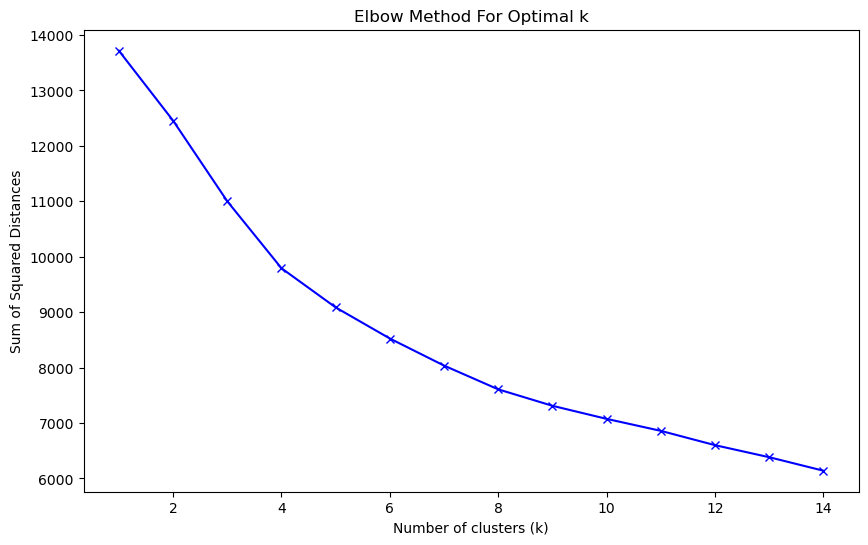

In [47]:
# Determinar el número óptimo de clusters usando el método del codo
sum_of_squared_distances = []
K = range(1, 15)  # Ajuste el rango según sea necesario
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Aunque el codo se alcanza a percibir en 4, siento que con 6 Clusters todavía tienes una buena ganacia de información y eso sirve para detallar un poco mas el analisis de los datos

In [34]:
# Convertir variables categóricas en variables dummies
categorical_features = ['Education', 'Industry', 'Geographic Location']
data_encoded = pd.get_dummies(di, columns=categorical_features, drop_first=True)

In [35]:
# Preparar los datos seleccionando características relevantes y normalizándolos
features = ['Age', 'Income', 'Tenure'] + list(data_encoded.columns[5:])  # Incluir características categóricas codificadas
x = data_encoded.loc[:, features].values
x = StandardScaler().fit_transform(x)  # Normalización de las características

In [48]:
# Aplicar K-means clustering para identificar segmentos de clientes
kmeans = KMeans(n_clusters=6, random_state=42) 
labels = kmeans.fit_predict(x)

C:\Users\52332\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [49]:
# Agregar las etiquetas del cluster al DataFrame original para análisis
data_encoded['Cluster'] = labels

In [50]:
# Visualizar los resultados del clustering
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

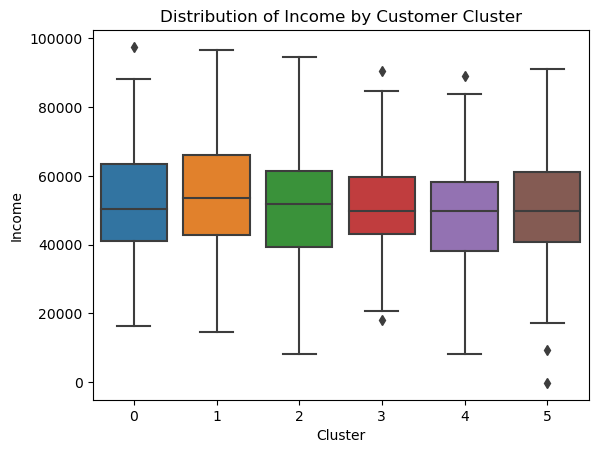

In [51]:
# Create a boxplot to visualize the distribution of 'Income' for each 'Cluster'
sns.boxplot(x='Cluster', y='Income', data=data_encoded)

# Set labels and title
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.title('Distribution of Income by Customer Cluster')

# Display the plot
plt.show()

In [54]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Define a function to summarize the cluster characteristics
def summarize_clusters(data):
    # Numerical features
    numerical_features = ['Age', 'Income', 'Tenure']  # Modify this list based on your dataset
    # Categorical features (assuming dummy variables were created)
    categorical_features = [col for col in data.columns if col.startswith('Education') or col.startswith('Industry') or col.startswith('Geographic Location')]

    # Summary DataFrame for numerical features
    cluster_summary_numerical = data.groupby('Cluster')[numerical_features].mean()
    
    # Summary DataFrame for categorical features
    cluster_summary_categorical = data.groupby('Cluster')[categorical_features].agg(lambda x: x.value_counts().index[0])

    return cluster_summary_numerical, cluster_summary_categorical

In [55]:
# Generate the summary for each cluster
cluster_summary_numerical, cluster_summary_categorical = summarize_clusters(data_encoded)

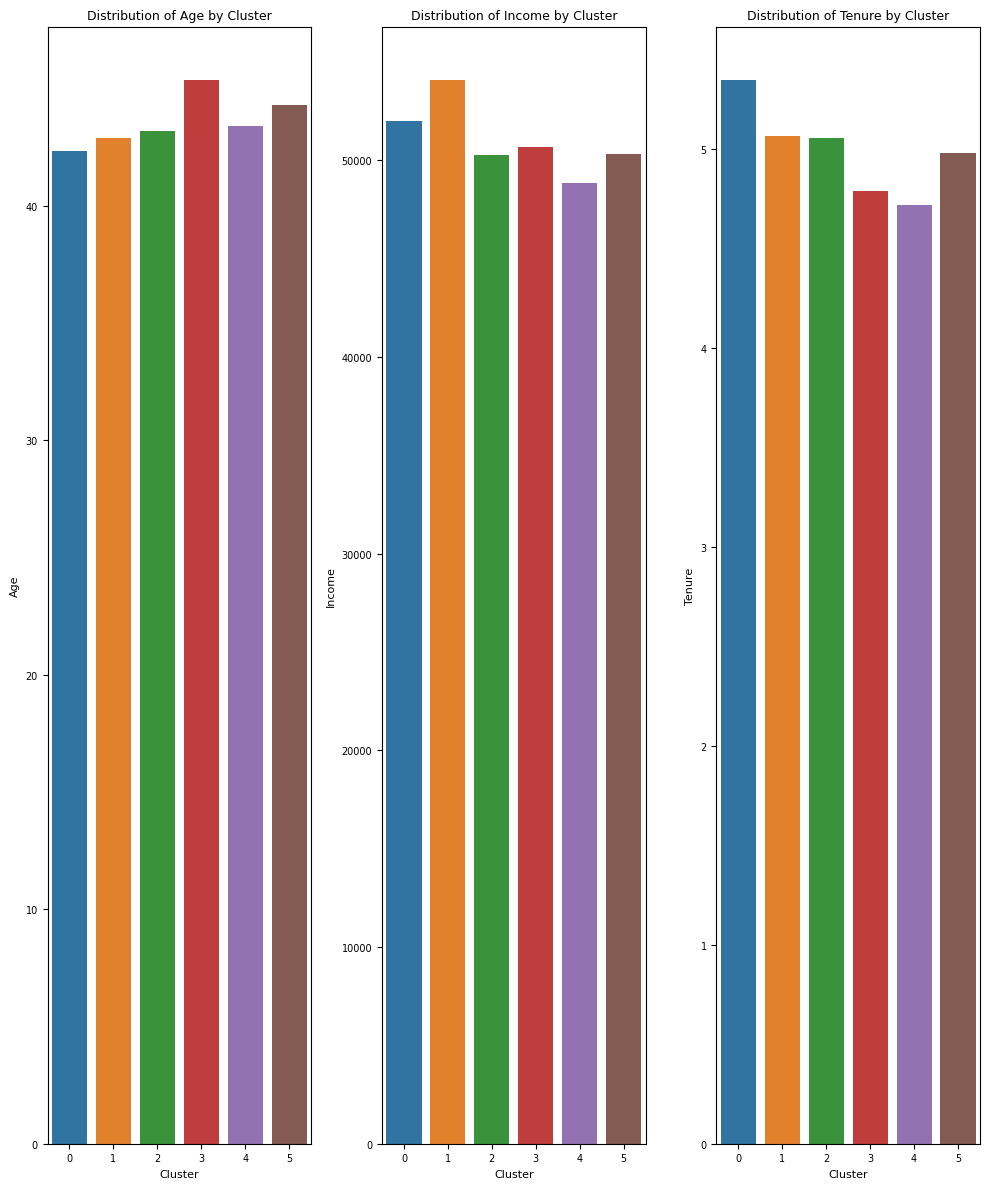

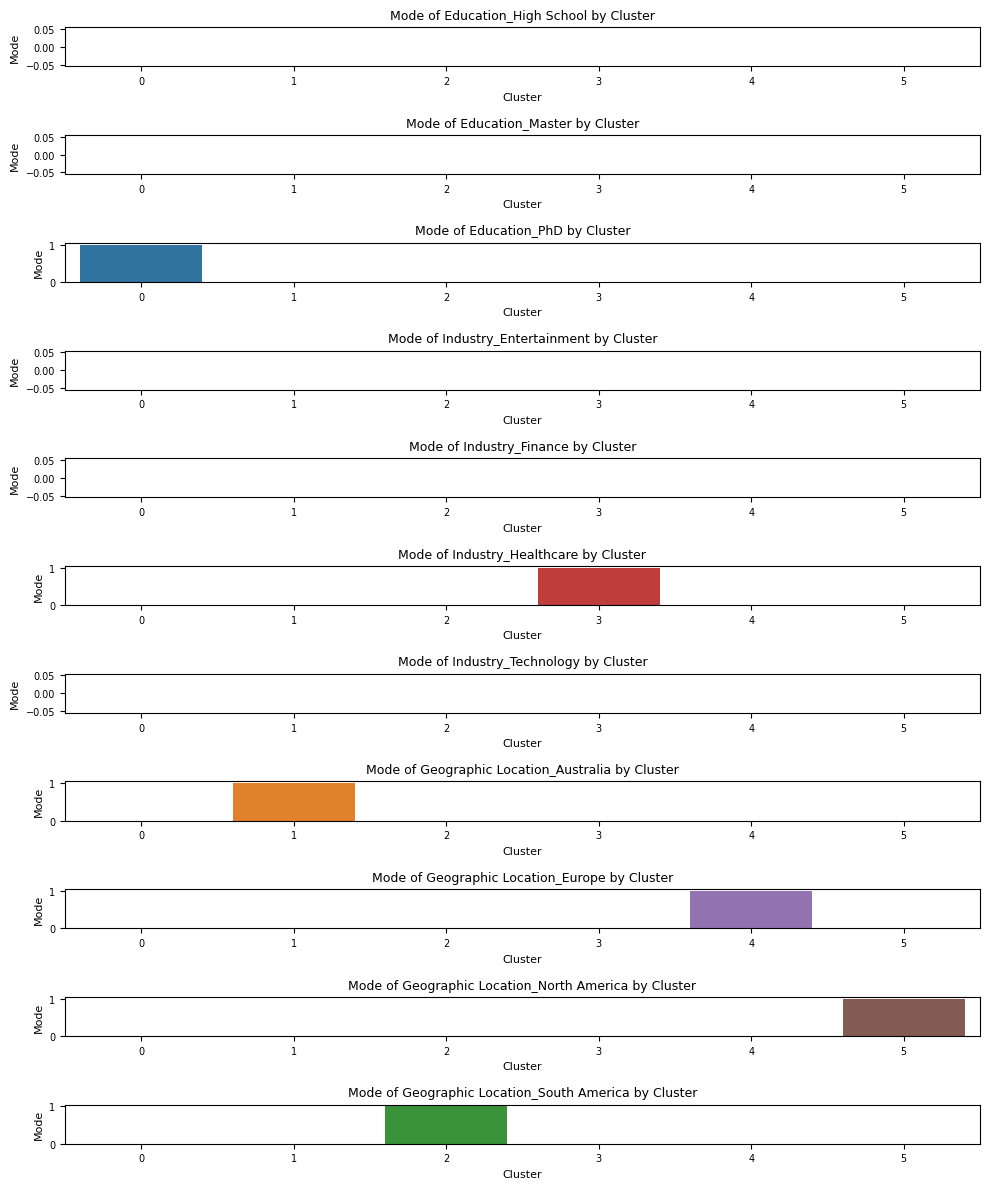

In [74]:
# Plotting
def plot_cluster_summary(cluster_summary_numerical, cluster_summary_categorical):
    # Plot numerical summaries
    fig, axes = plt.subplots(nrows=1, ncols=len(cluster_summary_numerical.columns), figsize=(10, 12))
    for i, col in enumerate(cluster_summary_numerical.columns):
        sns.barplot(x=cluster_summary_numerical.index, y=col, data=cluster_summary_numerical, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} by Cluster', fontsize=9)  # Tamaño del título
        axes[i].set_xlabel('Cluster', fontsize=8)  # Tamaño del nombre del eje X
        axes[i].set_ylabel(col, fontsize=8)  # Tamaño del nombre del eje Y
        axes[i].tick_params(labelsize=7)  # Tamaño de las etiquetas de los ticks

    plt.tight_layout()
    plt.show()

    # Plot categorical summaries
    fig, axes = plt.subplots(nrows=len(cluster_summary_categorical.columns), ncols=1, figsize=(10, 12))
    for i, col in enumerate(cluster_summary_categorical.columns):
        sns.barplot(x=cluster_summary_categorical.index, y=col, data=cluster_summary_categorical, ax=axes[i])
        axes[i].set_title(f'Mode of {col} by Cluster', fontsize=9)  # Tamaño del título
        axes[i].set_xlabel('Cluster', fontsize=8)  # Tamaño del nombre del eje X
        axes[i].set_ylabel('Mode', fontsize=8)  # Tamaño del nombre del eje Y
        axes[i].tick_params(labelsize=7)  # Tamaño de las etiquetas de los ticks

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_cluster_summary(cluster_summary_numerical, cluster_summary_categorical)


Conclusiones: 
El cluster 3 que es el de la industria de Healhcare es el que tiene personas más viejitas
El cluster 0 que es el que esta estudiando su Phd es el que tiene personas más jovenes
El cluster 1 que es el que se encuentra de Australia es el que tiene un salario más alto
El cluster 0 que es el que esta estudiando su PhD es el que tiene mayor tenure
El cluster 4 que es el que se encuentra en Europa es el de menor salario y tenure
El cluster 2 que es el que se encuentra en South America
El cluster 5 que es el que se encuentra en North America